In [34]:
import numpy as np
from matplotlib import pyplot as plt
import copy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [35]:
#STOCHASTIC GRADIENT DESCENT - y = w1*x1 + w2*x2
lst_of_ys = np.array([2, 2.5, 4, 5])
lst_of_xs = np.array([[1, 1],[0.5,2], [3,1], [2,3]])
#USED WEIGHTS - W1 = 1; W2 = 1
lst_of_ws = np.random.random(2)
orig_lst_of_ws = copy.deepcopy(lst_of_ws)
counter = 0
orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
print lst_of_ws
lst_of_errs = []
while orig_err > 0.0001:
    err = [lst_of_ys[i] - (lst_of_ws[0] * m[0] + lst_of_ws[1] * m[1]) for i, m in enumerate(lst_of_xs)]
    delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
    lst_of_ws -= 0.0001 * delta
    orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
    lst_of_errs.append(orig_err)
    counter += 1
print counter

[0.47054355 0.61378997]
4229


In [36]:
#STOCHASTIC GRADIENT DESCENT - y = w1*x1 + w2*x2
lst_of_ys = np.array([2, 2.5, 4, 5])
lst_of_xs = np.array([[1, 1],[0.5,2], [3,1], [2,3]])
#USED WEIGHTS - W1 = 1; W2 = 1
lst_of_ws = np.random.random(2)
orig_lst_of_ws = copy.deepcopy(lst_of_ws)
counter = 0
orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
print "STARTING WEIGHTS: ", lst_of_ws
print "STARTING ERROR: ", orig_err
lst_of_errs = []
delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
#print np.abs(delta)
while np.any(np.abs(delta) > 0.005):
    delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
#     print np.any(np.abs(delta) > 0.005)
    lst_of_ws -= 0.0001 * delta
    orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
    lst_of_errs.append(orig_err)
    counter += 1
print "FINAL ERROR: ", orig_err
print "FINAL WEIGHTS: ", lst_of_ws
print "NUMBER OF STEPS: ", counter

STARTING WEIGHTS:  [0.7118465  0.71726741]
STARTING ERROR:  4.174626554258225
FINAL ERROR:  3.3331076511618958e-06
FINAL WEIGHTS:  [0.99930989 1.00066697]
NUMBER OF STEPS:  3332


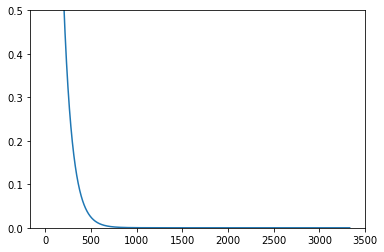

In [37]:
plt.ylim([0, 0.5])
plt.plot([x for x in range(len(lst_of_errs))], lst_of_errs)

In [38]:
#PREPARING SOME RANDOM DATA IN 3 DIMENSION WITH EQUATION Y = AX1 + BX2
#y = 10x1 + 15x2
x1 = [x * 1./1000 for x in range(1000)]
x2 = [x * 1./1000 for x in range(1000)]
np.random.shuffle(x1)
# np.random.shuffle(x2)
x1 = np.array(x1); x2 = np.array(x2)
randomiser = np.random.random(len(x1))*1.
y = 1.5 * x1 + 3.7 * x2 + randomiser*1./10

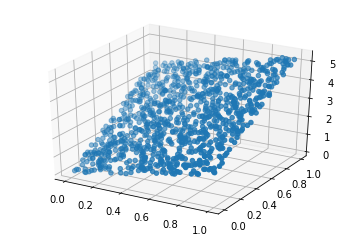

In [39]:
#DATA VIS IN 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax = plt.axes(projection='3d')
ax.scatter(x1, x2, y, zdir='z', s=20, c=None, depthshade=True)

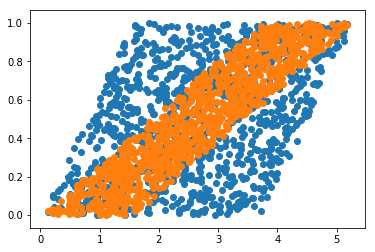

In [40]:
#DATA VIS IN 2D
plt.scatter(y, x1)
plt.scatter(y, x2)

In [41]:
lst_of_ys = y
lst_of_xs = np.array([x1, x2]).T
lst_of_ws = np.random.random(2)
orig_lst_of_ws = copy.deepcopy(lst_of_ws)
counter = 0
orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
print "STARTING WEIGHTS: ", lst_of_ws
print "STARTING ERROR: ", orig_err
lst_of_errs = []
delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
#print np.abs(delta)
while np.any(np.abs(delta) > 0.005):
    delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
#     print np.any(np.abs(delta) > 0.005)
    lst_of_ws -= 0.0001 * delta
    orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
    lst_of_errs.append(orig_err)
    counter += 1
print "FINAL ERROR: ", orig_err
print "FINAL WEIGHTS: ", lst_of_ws
print "NUMBER OF STEPS: ", counter

STARTING WEIGHTS:  [0.98298096 0.11411761]
STARTING ERROR:  5507.895631068125
FINAL ERROR:  1.2099298424654452
FINAL WEIGHTS:  [1.54432156 3.74236986]
NUMBER OF STEPS:  654


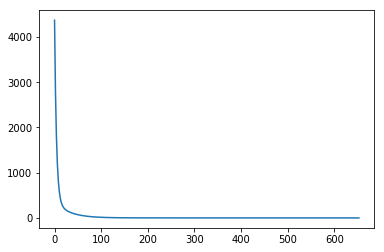

In [42]:
#ERROR VISUALISATION
plt.plot([i for i, _ in enumerate(lst_of_errs)], lst_of_errs)